In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model    import Ridge
from sklearn.pipeline        import make_pipeline
from sklearn.metrics         import mean_squared_error, r2_score

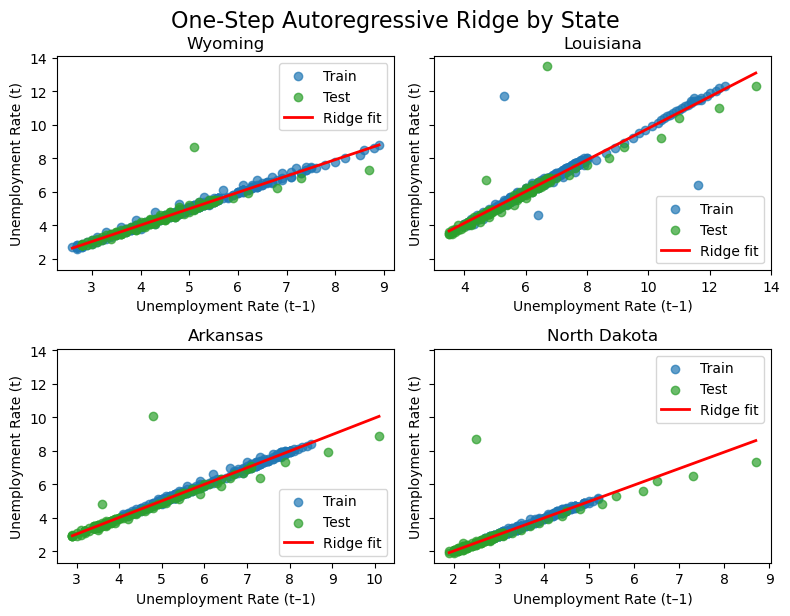

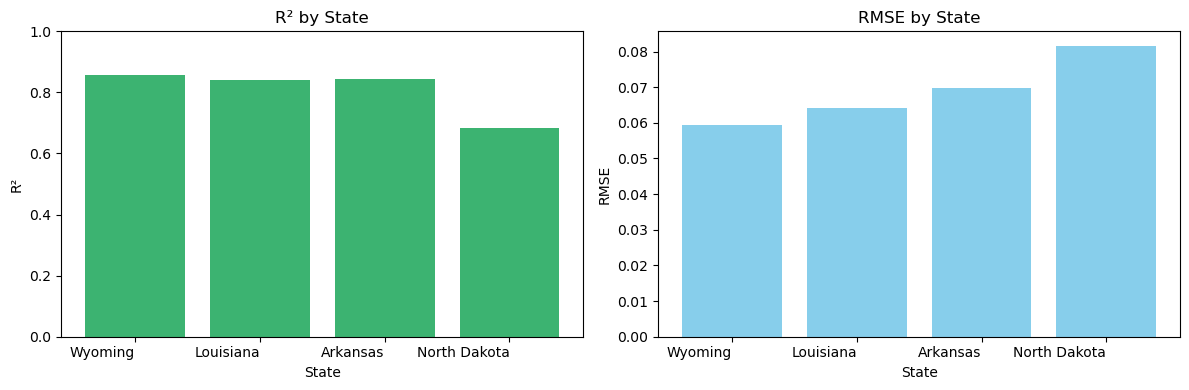

In [ ]:
df = pd.read_csv('data/analysis_data/merged_data_US.csv', parse_dates=['month'])
REP = ['Wyoming', 'Louisiana', 'Arkansas', 'North Dakota']
r2_scores   = []
rmse_scores = []

fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharey=True)
axes = axes.flatten()

for ax, state in zip(axes, REP):
    sub = df[df['state'] == state].sort_values('month').copy()
    sub['u_lag1'] = sub['unemployment_rate'].shift(1)
    sub = sub.dropna(subset=['u_lag1'])
    X = sub[['u_lag1']].values
    y = sub['unemployment_rate'].values
    n = len(sub)
    n_train = int(n * 0.7)
    X_train, X_test = X[:n_train], X[n_train:]
    y_train, y_test = y[:n_train], y[n_train:]
    model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2    = model.score(X_test, y_test)
    range_y = y_test.max()-y_test.min()
    rmse  = np.sqrt(mean_squared_error(y_test, y_pred))
    nrmse = rmse/ range_y
    r2_scores.append(r2)
    rmse_scores.append(nrmse)

    xs = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
    ys = model.predict(xs)
    ax.scatter(X_train, y_train, color='C0', label='Train', alpha=0.7)
    ax.scatter(X_test,  y_test,  color='C2', label='Test',  alpha=0.7)
    ax.plot(xs, ys, color='r', lw=2, label='Ridge fit')
    ax.set_title(f"{state}")
    ax.set_xlabel('Unemployment Rate (t–1)')
    ax.set_ylabel('Unemployment Rate (t)')
    ax.legend()

plt.tight_layout()
plt.suptitle('One-Step Autoregressive Ridge by State', y=1.02, fontsize=16)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
# R² bar chart
ax1.bar(REP, r2_scores,color="mediumseagreen")
ax1.set_title('R² by State')
ax1.set_ylabel('R²')
ax1.set_xlabel('State')
ax1.set_ylim(0, 1)
ax1.set_xticks(range(len(REP)))
ax1.set_xticklabels(REP, rotation=0, ha='right')
# RMSE bar chart
ax2.bar(REP, rmse_scores,color="skyblue")
ax2.set_title('RMSE by State')
ax2.set_ylabel('RMSE')
ax2.set_xlabel('State')
ax2.set_xticks(range(len(REP)))
ax2.set_xticklabels(REP, rotation=0, ha='right')

plt.tight_layout()
plt.show()
